# Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np

# Exploratory Data Analysis (EDA)
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Modelling
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [3]:
df_segmentation = pd.read_csv("segmentation data.csv")

# Project Objectives

The primary objective of this project is to perform a customer segmentation analysis using machine learning techniques. By clustering customers based on their demographic and behavioral characteristics, we aim to uncover distinct groups within the customer base. This segmentation will enable us to:

* Understand Customer Profiles: Identify and understand the different types of customers, including their purchasing behaviors and preferences.
* Personalize Marketing Strategies: Develop targeted marketing campaigns and personalized strategies for each customer segment to improve customer engagement and satisfaction.
* Enhance Business Decision-Making: Provide valuable insights for data-driven decision-making in areas such as product development, pricing strategies, and customer service enhancements.
* Improve Resource Allocation: Allocate resources more effectively by focusing on high-value customer segments and optimizing marketing and operational efforts.
* Increase Revenue and Profitability: Ultimately, drive business growth by increasing customer retention, enhancing customer lifetime value, and acquiring new customers through more effective segmentation strategies.

By achieving these objectives, the project will contribute to a deeper understanding of our customer base, leading to more informed business strategies and improved overall performance.

# Exploratory Data Analysis (EDA)

* Data Understanding: check the data types of each column to ensure they are appropriate for the analysis and calculate basic statistics (mean, median, standard deviation, etc.) to get an overview of the data distribution.

* Data Cleaning: identify and handle missing values through imputation or removal, depending on the context, and detect and address outliers that might skew the analysis.

* Data Transformation: convert categorical variables (Gender) into numerical format.

* Data Visualization: use scatter plots, and histograms to explore relationships between pairs of variables.



In [4]:
df_segmentation.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df_segmentation.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df_segmentation.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# Searching for null values

null_counts = df_segmentation.isnull().sum()
total_rows = len(df_segmentation)
null_percentage = (null_counts / total_rows) * 100

null_summary_df = pd.DataFrame({
    'Column': null_counts.index,
    'Total Values': total_rows,
    'Null Values': null_counts.values,
    'Percentage': null_percentage.values
})
print(null_summary_df)

                   Column  Total Values  Null Values  Percentage
0              CustomerID           200            0         0.0
1                  Gender           200            0         0.0
2                     Age           200            0         0.0
3      Annual Income (k$)           200            0         0.0
4  Spending Score (1-100)           200            0         0.0


In [8]:
# Format Gender to binary

df_segmentation['Gender'] = df_segmentation['Gender'].map({'Male': 0, 'Female': 1})

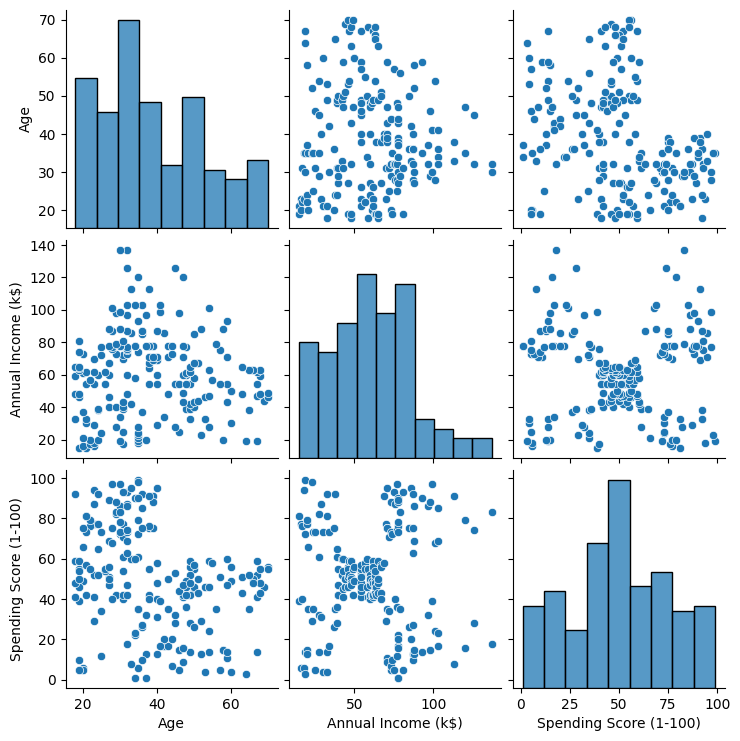

In [9]:
# Distribution of numerical variables

sns.pairplot(df_segmentation[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

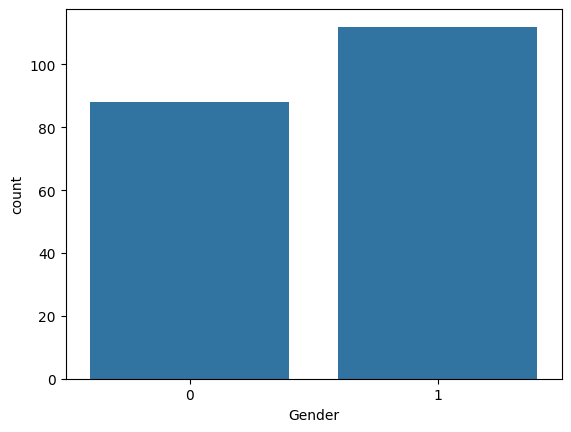

In [10]:
# Gender distribution ====> Male = 0 and Female = 1

sns.countplot(x='Gender', data=df_segmentation)
plt.show()

In [11]:
fig  = px.scatter(df_segmentation, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', width = 800, color = "Age",title = 'Income vs. Score by Age')
fig.show()

In [12]:
fig  = px.scatter(df_segmentation, x = 'Annual Income (k$)', y = 'Age', width = 800, color = "Gender",title = 'Income vs. Age by Gender')
fig.show()

# Modelling

* Model Selection: choose appropriate clustering algorithms based on the data characteristics and analysis goals (K-means, DBSCAN, Agglomerative Clustering) experimenting with different parameters (number of clusters in K-means and AC, eps in DBSCAN) to find the optimal configuration.

* Model Training: apply the algorithm to the data to create the model.

* Model Evaluation: evaluate the quality of clusters using metrics like silhouette score and Davies-Bouldin index. After visualize the resulting clusters using scatter plots to understand their structure and distribution.

K-Means

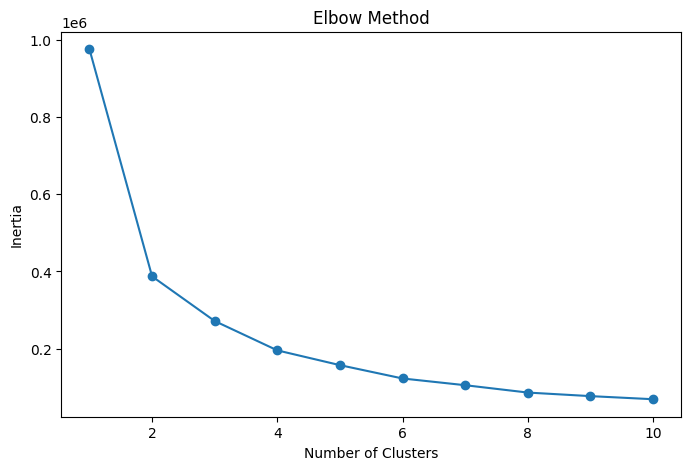

In [13]:
# Determine inertia for different numbers of clusters

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = 10)
    kmeans.fit(df_segmentation)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [15]:
# Setting K-Means

features_kmeans = df_segmentation.iloc[:, 1:] # Remove Id
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42,n_init = 10)
Clusters_KMeans = kmeans.fit_predict(features_kmeans)
features_kmeans.loc[:, 'Cluster'] = Clusters_KMeans

In [16]:
# Analyze cluster characteristics

cluster_analysis = features_kmeans.groupby('Cluster').mean()
print(cluster_analysis)

           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.608696  45.217391           26.304348               20.913043
1        0.538462  32.692308           86.538462               82.128205
2        0.486486  40.324324           87.432432               18.189189
3        0.582278  43.126582           54.822785               49.835443
4        0.590909  25.272727           25.727273               79.363636


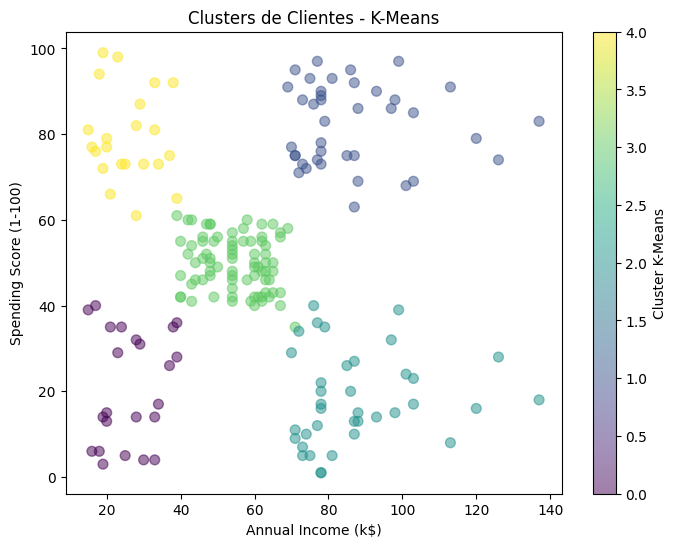

In [17]:
# Cluster Plot

plt.figure(figsize=(8, 6))
plt.scatter('Annual Income (k$)', 'Spending Score (1-100)', data=features_kmeans, c='Cluster',cmap='viridis', s=50, alpha=0.5)
plt.title('Clusters de Clientes - K-Means')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster K-Means')
plt.show()

DBSCAN


In [18]:
# Setting DBSCAN

features_DBSCAN = df_segmentation.iloc[:, 1:] # Remove Id
dbscan = DBSCAN(eps=13, min_samples=10)
Clusters_DBSCAN = dbscan.fit_predict(features_DBSCAN)
features_DBSCAN.loc[:, 'Cluster'] = Clusters_DBSCAN

In [19]:
# Analyze cluster characteristics

cluster_analysis = features_DBSCAN.groupby('Cluster').mean()
print(cluster_analysis)

           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
-1       0.550000  39.716667           64.216667               33.083333
 0       0.588235  24.764706           25.588235               74.764706
 1       0.573171  43.024390           55.109756               49.304878
 2       0.548387  32.709677           79.774194               82.483871
 3       0.500000  42.400000           83.200000               18.400000


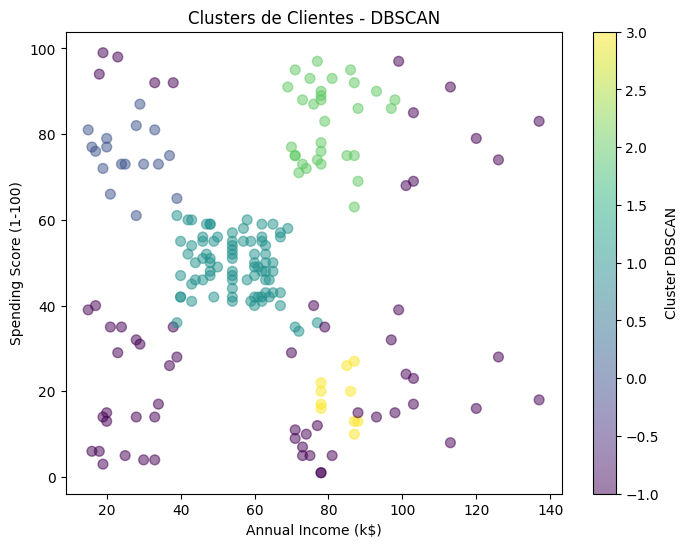

In [20]:
# Cluster Plot

plt.figure(figsize=(8, 6))
plt.scatter('Annual Income (k$)', 'Spending Score (1-100)', data=features_DBSCAN, c='Cluster',cmap='viridis', s=50, alpha=0.5)
plt.title('Clusters de Clientes - DBSCAN')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster DBSCAN')
plt.show()

Agglomerative Clustering

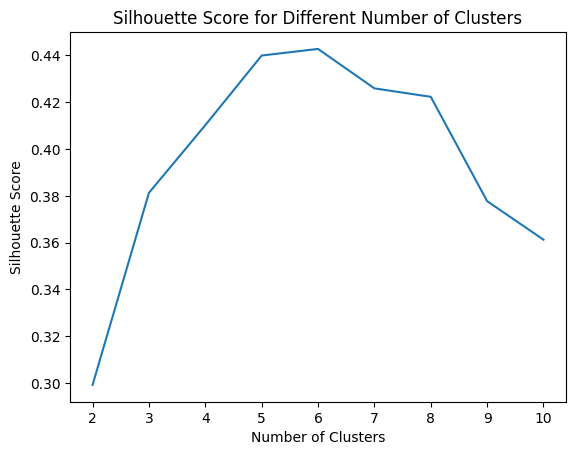

Best Cluster Number: 6


In [21]:
# Finding the best Cluster Number

features_AC = df_segmentation.iloc[:, 1:] # Remove Id
def find_optimal_clusters(features_DBSCAN, max_clusters=10):
    silhouette_scores = []

    for n_clusters in range(2, max_clusters+1):
        model = AgglomerativeClustering(n_clusters=n_clusters)
        labels = model.fit_predict(features_AC)
        silhouette_avg = silhouette_score(features_AC, labels)
        silhouette_scores.append(silhouette_avg)

    # Plot the silhouette scores

    plt.plot(range(2, max_clusters+1), silhouette_scores)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for Different Number of Clusters')
    plt.show()

    optimal_clusters = np.argmax(silhouette_scores) + 2  # +2 because the range starts at 2

    return optimal_clusters


optimal_clusters = find_optimal_clusters(features_DBSCAN, max_clusters=10)
print("Best Cluster Number:", optimal_clusters)

In [22]:
# Setting Agglomerative Clustering

model = AgglomerativeClustering(n_clusters=5) # I will use the cluster number 5 due to the silhouette score plot
Clusters_AC = model.fit_predict(features_kmeans)
features_AC.loc[:, 'Cluster'] = Clusters_AC

In [23]:
# Analyze cluster characteristics

cluster_analysis = features_AC.groupby('Cluster').mean()
print(cluster_analysis)

           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.602410  42.156627           54.759036               49.771084
1        0.428571  41.685714           88.228571               17.285714
2        0.538462  32.692308           86.538462               82.128205
3        0.600000  24.850000           24.950000               81.000000
4        0.608696  45.217391           26.304348               20.913043


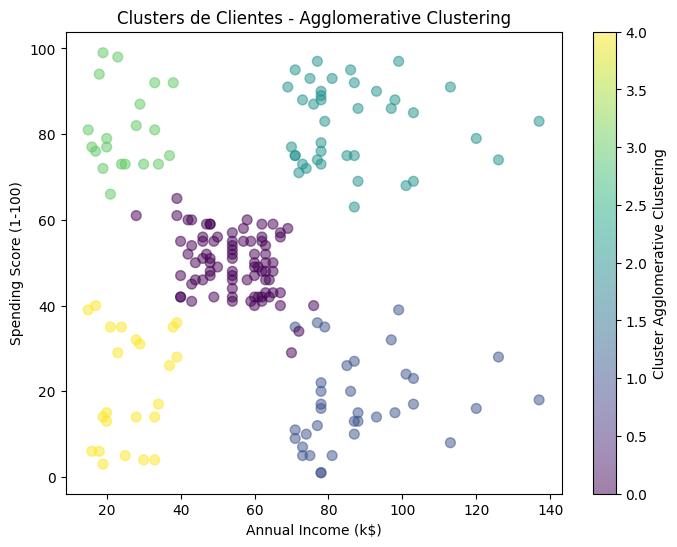

In [24]:
# Cluster Plot

plt.figure(figsize=(8, 6))
plt.scatter('Annual Income (k$)', 'Spending Score (1-100)', data=features_AC, c='Cluster',cmap='viridis', s=50, alpha=0.5)
plt.title('Clusters de Clientes - Agglomerative Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster Agglomerative Clustering')
plt.show()

Model Evaluation

In [25]:
# Setting Models

n_clusters = 5

models = {
    'KMeans': KMeans(n_clusters=n_clusters, random_state=42,n_init = 10),
    'DBSCAN': DBSCAN(eps=13, min_samples=10), # same parameters from previous model
    'AgglomerativeClustering': AgglomerativeClustering(n_clusters=n_clusters)
}

In [26]:
# Clustering Evaluation with Silhouette Score and  Davies Bouldin Index

silhouette_scores = {}
davies_bouldin_indices = {}
labels_dict = {}
features = df_segmentation.iloc[:, 1:]

for name, model in models.items():
    # Train
    labels = model.fit_predict(features)
    labels_dict[name] = labels

    # Performance
    silhouette_avg = silhouette_score(features, labels)
    db_index = davies_bouldin_score(features, labels)

    silhouette_scores[name] = silhouette_avg
    davies_bouldin_indices[name] = db_index

    print(f'{name} - Silhouette Score: {silhouette_avg}, Davies-Bouldin Index: {db_index}')

KMeans - Silhouette Score: 0.44424291275274114, Davies-Bouldin Index: 0.8196433344356222
DBSCAN - Silhouette Score: 0.18699358696080978, Davies-Bouldin Index: 2.28192907500783
AgglomerativeClustering - Silhouette Score: 0.43997527212476695, Davies-Bouldin Index: 0.8220436090843712


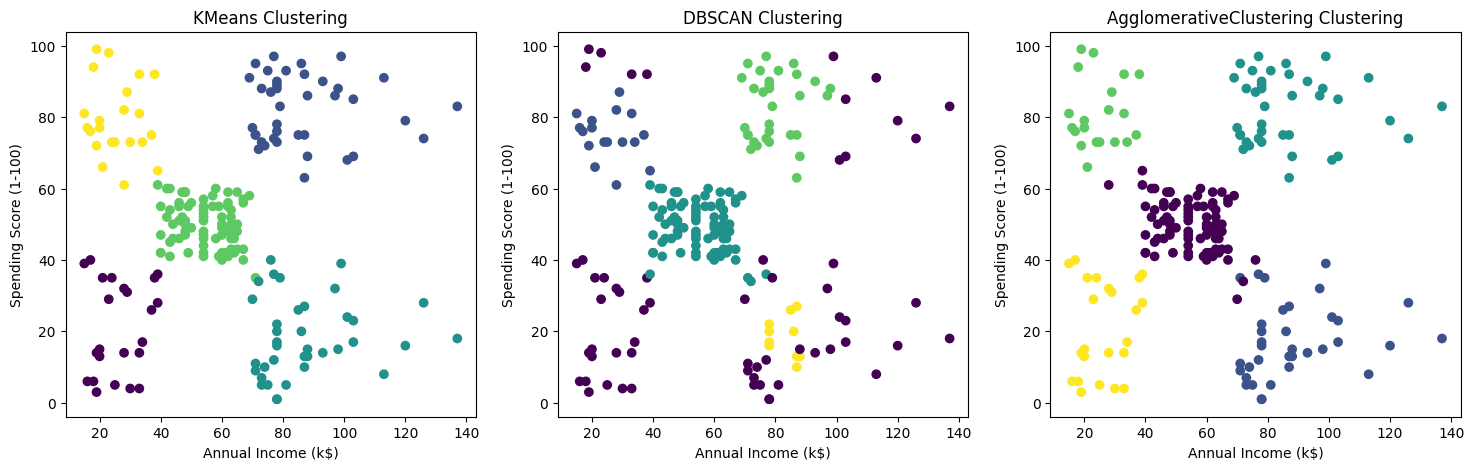

In [27]:
# Plot

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (name, labels) in zip(axes, labels_dict.items()):
    ax.scatter('Annual Income (k$)', 'Spending Score (1-100)', data=features, c=labels, cmap='viridis', marker='o')
    ax.set_title(f'{name} Clustering')
    ax.set_xlabel('Annual Income (k$)')
    ax.set_ylabel('Spending Score (1-100)')

plt.show()

# Model Interpretation

After evaluating the clustering models using Silhouette Score and Davies-Bouldin Index, we can interpret the quality and performance of each model as follows:

## KMeans Clustering

* Silhouette Score: 0.4442
* Davies-Bouldin Index: 0.8196

A higher Silhouette Score indicates better-defined clusters, with values closer to 1 being ideal, suggesting that the clusters are moderately well-defined. The Davies-Bouldin Index measures the average similarity ratio of each cluster with its most similar cluster, where lower values indicate better separation between clusters. The value of 0.8196 indicates good separation and well-defined clusters.

## DBSCAN

* Silhouette Score: 0.1870
* Davies-Bouldin Index: 2.2819

The low Silhouette Score suggests that the clusters are not well-defined, and many points may be located on the boundaries of clusters or in overlapping regions. The high Davies-Bouldin Index further indicates poor cluster separation and cohesion, making DBSCAN less suitable for this dataset.

## Agglomerative Clustering

* Silhouette Score: 0.4400
* Davies-Bouldin Index: 0.8220

These metrics are similar to those of KMeans, indicating moderately well-defined and well-separated clusters. However, the KMeans model slightly outperformed Agglomerative Clustering, making it the best choice.



Based on the KMeans model, the clustered data reveals the following distinct customer segments:

* Cluster 0: primarily consists of older females with an average age of 45 years. They tend to have a lower income, averaging 26,304, and exhibit low spending behavior with an average spending score of 20.91.
* Cluster 1: is characterized by a balanced gender ratio, slightly more female, with a younger age group averaging 32 years. This cluster has a high income, averaging 86,538, and high spending behavior, with an average spending score of 82.13.
* Cluster 2: also has a balanced gender ratio, slightly more male, and includes middle-aged individuals averaging 40 years. They have a high income of 87,432 but low spending behavior, with an average spending score of 18.19.
* Cluster 3: consists predominantly of older females with an average age of 43 years. They have a moderate income, averaging 54,823, and exhibit moderate spending behavior, with an average spending score of 49.84.
* Cluster 4: is characterized by predominantly young females, averaging 25 years. This cluster has a lower income, averaging 25,727, but shows high spending behavior with an average spending score of 79.36.

Based on these evaluations and the detailed cluster analysis, the KMeans model is recommended for clustering this dataset. KMeans effectively identifies distinct customer segments, which can be used to tailor marketing strategies, personalize customer experiences, and optimize resource allocation. The identified clusters provide valuable insights into the demographics, income levels, and spending behaviors of different customer groups, enabling data-driven decision-making for targeted marketing and customer relationship management.
